# Relatório de Análise VIII

## Identificando e Removendo Outliers

In [14]:
# Para funcionar no jupyter temos que configurar a plotagem inline
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
# Configurar o tamanho das figuras que vão ser gerada
plt.rc('figure', figsize = (20, 10))

In [15]:
dados = pd.read_csv('../dados/aluguel_residencial.csv', sep=';')

In [16]:
dados.head(10)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Tipo Agregado
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,42.50,Apartamento
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0,70.00,Casa
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,53.33,Apartamento
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,16.67,Apartamento
4,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,26.00,Apartamento
5,Casa de Condomínio,Barra da Tijuca,5,4,5,750,22000.0,0.0,0.0,29.33,Casa
6,Casa de Condomínio,Ramos,2,2,0,65,1000.0,0.0,0.0,15.38,Casa
7,Apartamento,Grajaú,2,1,0,70,1500.0,642.0,74.0,21.43,Apartamento
8,Apartamento,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0,16.67,Apartamento
9,Apartamento,Copacabana,1,0,1,40,2000.0,561.0,50.0,50.00,Apartamento


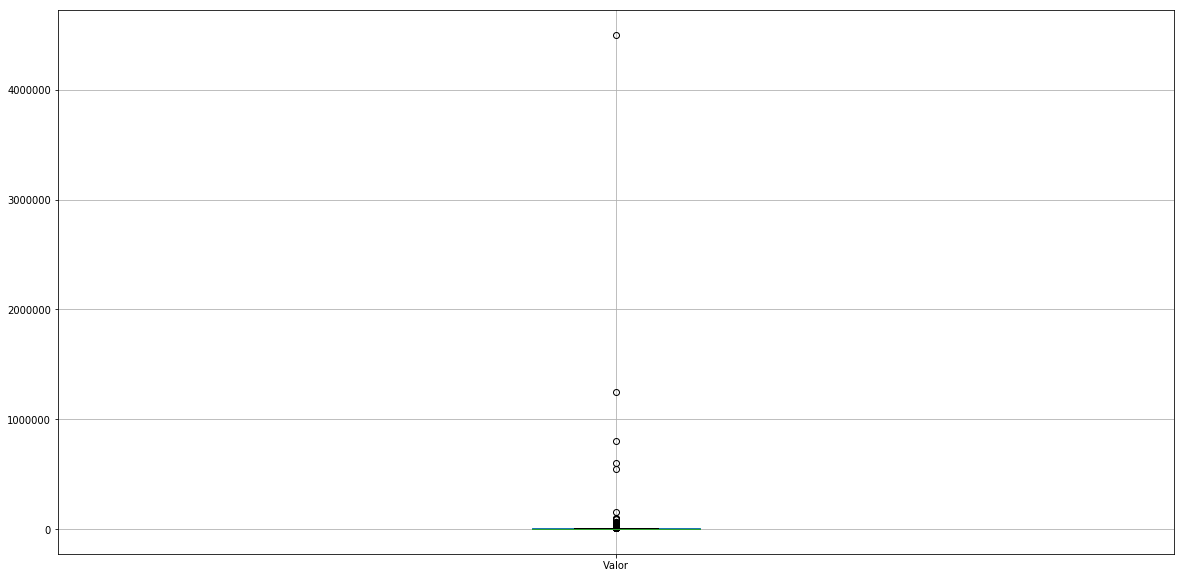

In [17]:
# O Grafico Box Plot, é um grafico utilizado para visualizar outliers em nossos dados, ou seja vamos conseguir
# analisar os dados discrepantes que atrapalham as medias e aumentam o desvio padrão
dados.boxplot(['Valor'])

In [18]:
dados[dados['Valor'] >= 500000]

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Tipo Agregado
7629,Apartamento,Barra da Tijuca,1,1,0,65,600000.0,980.0,120.0,9230.77,Apartamento
10636,Casa de Condomínio,Freguesia (Jacarepaguá),4,2,3,163,800000.0,900.0,0.0,4907.98,Casa
12661,Apartamento,Freguesia (Jacarepaguá),2,2,1,150,550000.0,850.0,150.0,3666.67,Apartamento
13846,Apartamento,Recreio dos Bandeirantes,3,2,1,167,1250000.0,1186.0,320.0,7485.03,Apartamento
15520,Apartamento,Botafogo,4,1,1,300,4500000.0,1100.0,0.0,15000.00,Apartamento


In [19]:
# Criando uma Series com os valores
valor = dados['Valor']

In [24]:
# Vamos dividir os dados de valor em quantils, 25% (.25)
Q1 = valor.quantile(.25)
# E o quartil 3 que é 75% (.75)
Q3 = valor.quantile(.75)
IIQ = Q3 - Q1
limite_inferior = Q1 - 1.5 * IIQ
limite_superior = Q3 + 1.5 * IIQ

In [25]:
selecao = (valor >= limite_inferior) & (valor <= limite_superior)
dados_new = dados[selecao]

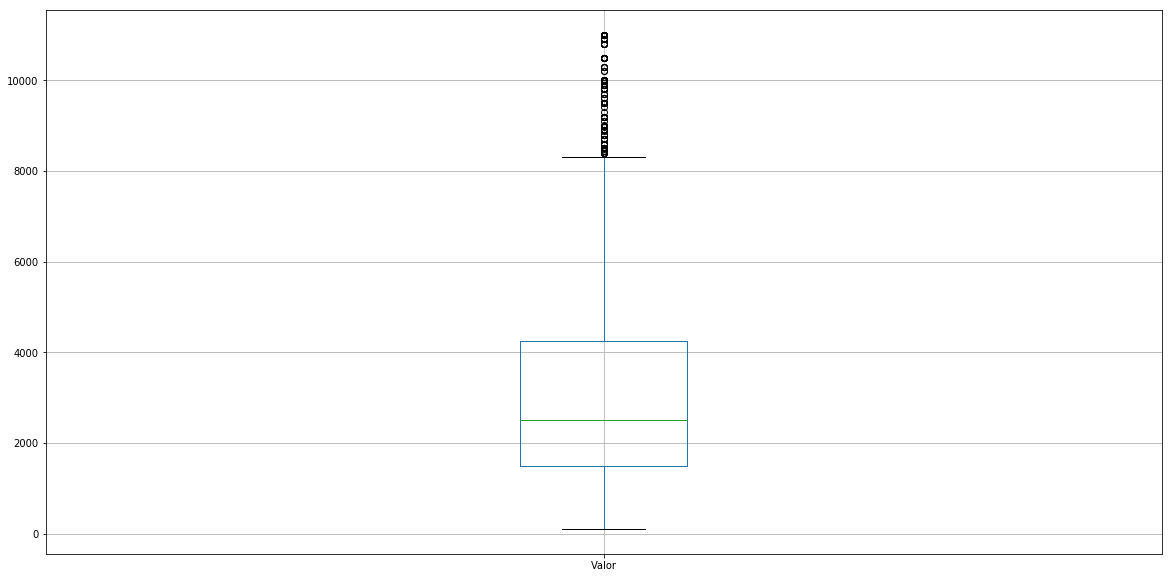

In [27]:
dados_new.boxplot(['Valor'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa16558eda0>]],
      dtype=object)

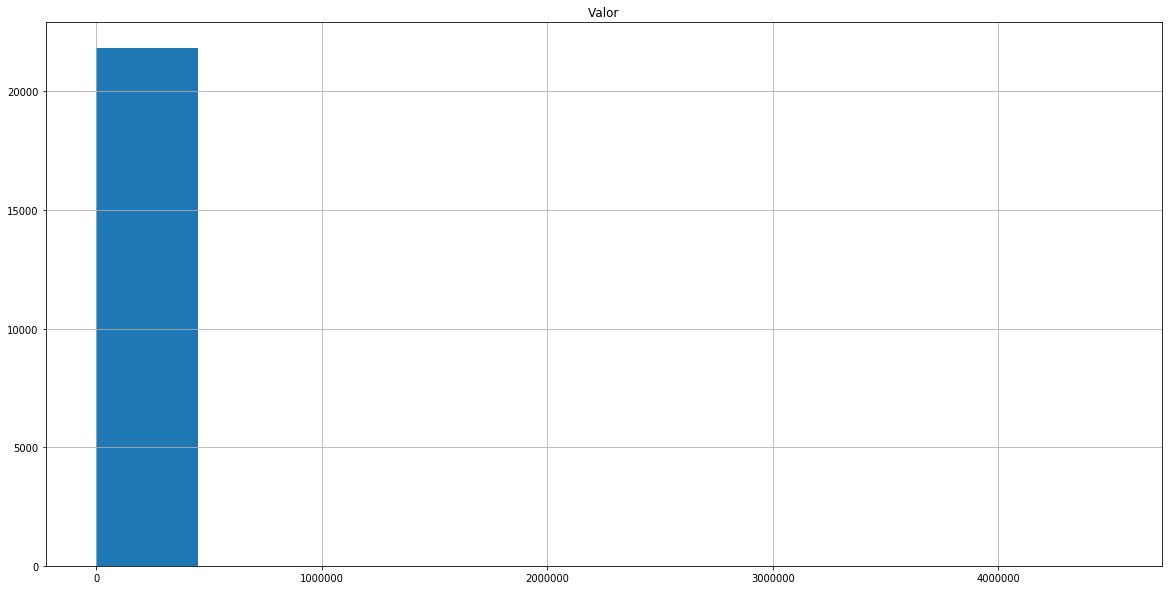

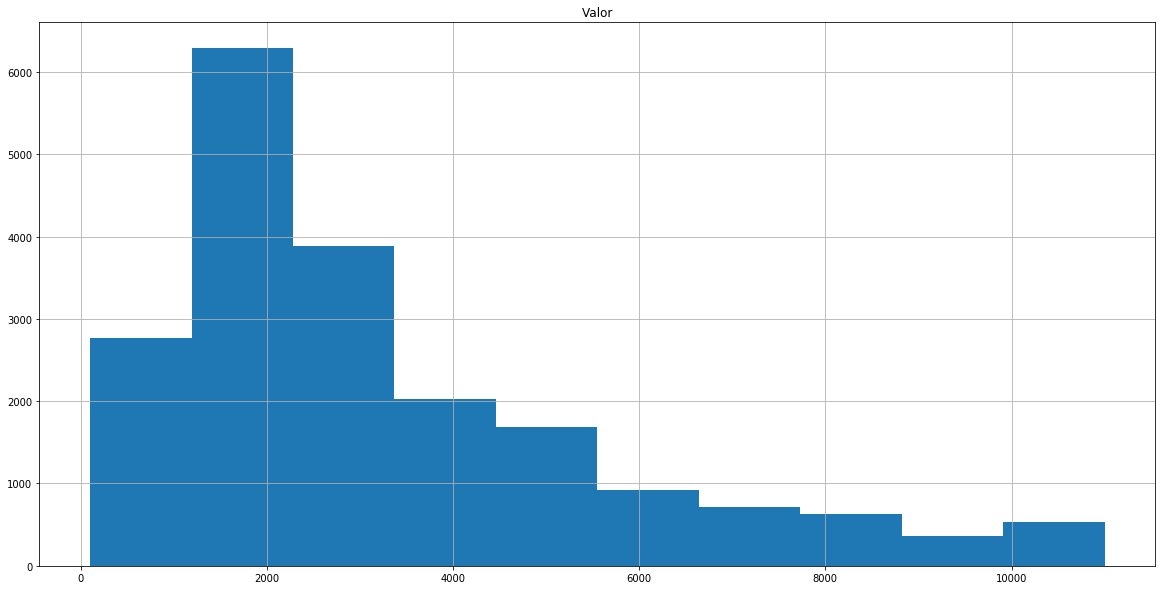

In [28]:
# Histograma para analisarmos as frequencia de alugueis de antes de remover os outliers e depois de remover
dados.hist(['Valor'])
dados_new.hist(['Valor'])